# complete EDA for Titanic dataset


Data Dictionary
Variable	Definition	Key

survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


kaggle competitions download -c titanic


In [1]:
#importing librabry which needed for this dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data collection

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# understanding the basic of data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# cheaking the Correlation 

<AxesSubplot:>

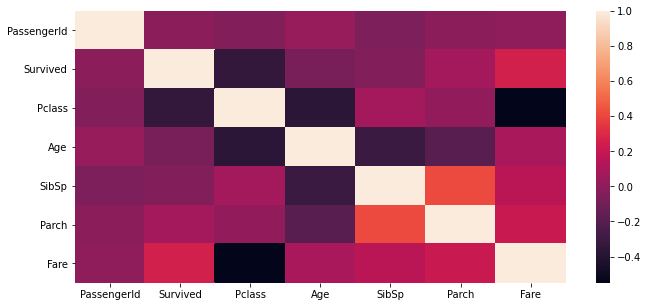

In [6]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr())

C:\Users\vadje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

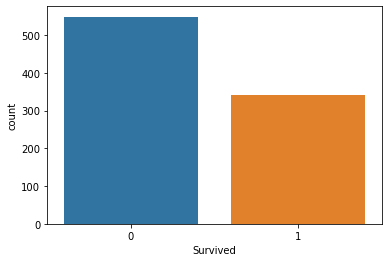

In [7]:
sns.countplot("Survived",data=df)

0 is showing that over 500 peoples are not able to survived and 1 is showing that over 300 peoples are survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

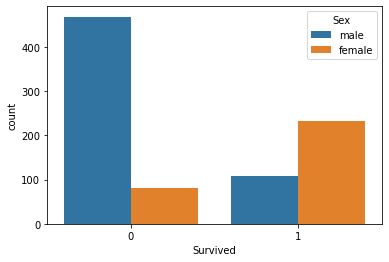

In [8]:
sns.countplot(x="Survived",hue="Sex",data=df)

from this graph we get the idea that most of male passengers are not able to survived

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

we get exact number that how many passengers are survived and how many died

<AxesSubplot:xlabel='Survived', ylabel='count'>

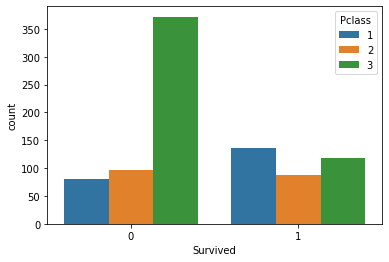

In [10]:
sns.countplot(x="Survived",hue="Pclass",data=df)

from this graph we can assume that the first class passangers died less and third class passangers died more 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

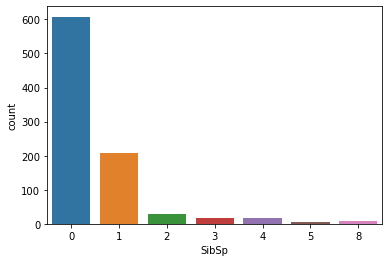

In [11]:
sns.countplot(x="SibSp",data=df)

from this graph we get the idea that around 600 peoples didn't have any siblings or spouse on titanic

# cheaking missing values

In [12]:
feature_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

In [13]:
feature_with_nan

['Age', 'Cabin', 'Embarked']

In [14]:
df["Age"].mean()

29.69911764705882

In [15]:
for i in feature_with_nan:
    print(np.round(df[i].isnull().mean()*100,3))
    

19.865
77.104
0.224


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

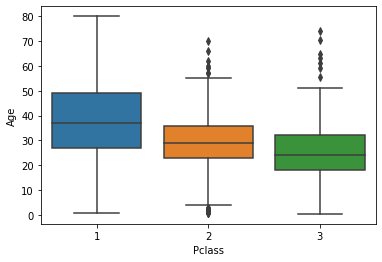

In [17]:
sns.boxplot(x="Pclass",y="Age",data=df)

this boxplot telling us that mean of  age of first class passanger is 38 where second class passangers is 29 and last one have 26 so, from this we can replace the nan values 

In [18]:
def age(cols):
    Age=cols[0]
    Pclass =cols[1]
    if pd.isnull(Age):

        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 26
    else:
        return Age

we replace the nan values with the avarage age

In [19]:
df["Age"]=df[["Age","Pclass"]].apply(age,axis=1)

In [20]:
df["Age"].isnull().sum()

0

see now we don't have any nan value in Age column

In [21]:
df.drop("Cabin",axis=1,inplace=True)

we are droping the cabin column beacause it have many nan values and for that we have to do feature Engineering on it

# converting categorical features to numeric


In [22]:
df.drop("Name",axis=1,inplace=True)


In [23]:
df.drop("Ticket",axis=1,inplace=True)

we do not need name and ticket column so we are droping them

In [24]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
df['Sex'] = df['Sex'].map({'male':1 , 'female':2})

In [26]:
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})

we convert the categorical features into numerical features so we can apply machine learning algorithms on it later

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,2,38.0,1,0,71.2833,1.0
2,3,1,3,2,26.0,0,0,7.9250,0.0
3,4,1,1,2,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0
